# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from pandas import DataFrame

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
df = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

6d74309364ab27c0e95be79d6af38e06


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

city_data = []
record_count = 1
set_count = 1
print("Beginning Data Retrieval")
print("------------------------")

for i, city in enumerate(cities):
    if (i%50==0 and i>=50):
        set_count += 1
        #set_count = set_count + 1
        record_count = 0
    print (f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    city_url = url + "q=" + city
    
   # try:
    city_weather = requests.get(city_url).json()
    city_data.append({
             "City":city,
        })
    #except:
     #   print("City not found. Skipping...")
      #  pass
print(city_data)

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | boa vista
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | sao marcos
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ahvaz
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | paita
Processing Record 9 of Set 1 | haibowan
Processing Record 10 of Set 1 | la uribe
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | hanmer springs
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | taolanaro
Processing Record 23 of Set 1 | gobabis
Processi

Processing Record 49 of Set 4 | sciacca
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | egvekinot
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | halalo
Processing Record 4 of Set 5 | erenhot
Processing Record 5 of Set 5 | half moon bay
Processing Record 6 of Set 5 | progreso
Processing Record 7 of Set 5 | yazoo city
Processing Record 8 of Set 5 | tevaitoa
Processing Record 9 of Set 5 | srednekolymsk
Processing Record 10 of Set 5 | shchelyayur
Processing Record 11 of Set 5 | puerto narino
Processing Record 12 of Set 5 | puerto quijarro
Processing Record 13 of Set 5 | tamworth
Processing Record 14 of Set 5 | vanderhoof
Processing Record 15 of Set 5 | albert


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

df = pd.read_csv("../output_data/cities.csv")
df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

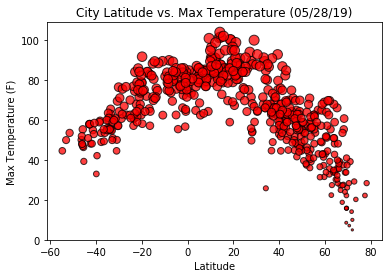

In [8]:
#get x and y values from the columns in dataframe
x_axis = df.Lat
y_axis = df["Max Temp"]

# The maximum y value for our chart will be 100
#y_limit = 100
#x_limit = plt.xlim (-100,100)

# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(-60, 80,1)
#y_axis = np.arange(0, y_limit,1)

# Create a random array of data that we will use for our x values
#x_axis = [random.random() for value in y_axis]

plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=y_axis, alpha=0.75)
plt.show()

#### Latitude vs. Humidity Plot

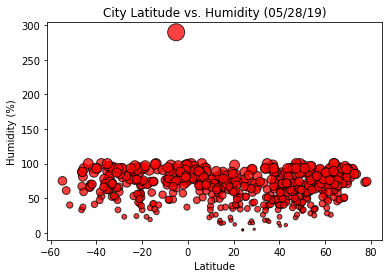

In [9]:
x_axis = df.Lat
y_axis = df["Humidity"]
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=y_axis, alpha=0.75)
plt.show()

#### Latitude vs. Cloudiness Plot

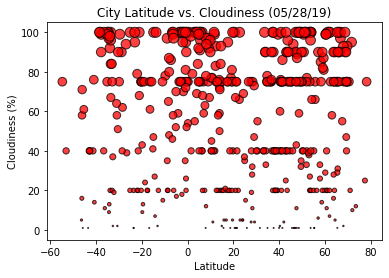

In [10]:
x_axis = df.Lat
y_axis = df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=y_axis, alpha=0.75)
plt.show()

#### Latitude vs. Wind Speed Plot

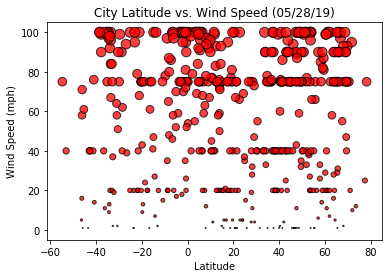

In [11]:
x_axis = df.Lat
y_axis = df["Cloudiness"]
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=y_axis, alpha=0.75)
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames
NorthernHem_df = df.loc[(df["Lat"]>=0)]
SouthernHem_df = df.loc[(df["Lat"]<=0)]
#print (SouthernHem_df)
#SouthernHem_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

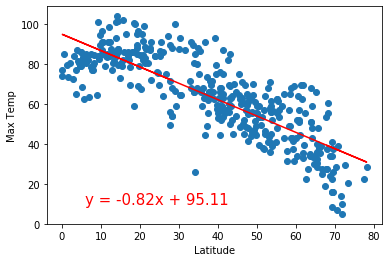

In [14]:
x_axis = NorthernHem_df.Lat
y_axis = NorthernHem_df["Max Temp"]
#plt.title("City Latitude vs. Wind Speed (05/28/19)")
#plt.xlabel("Latitude")
#plt.ylabel("Max Temp")
#plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            #s=y_axis, alpha=0.75)
#plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

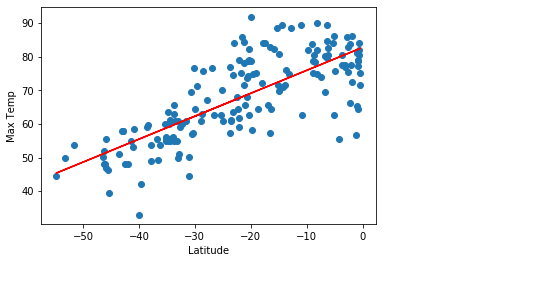

In [15]:
x_axis = SouthernHem_df.Lat
y_axis = SouthernHem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

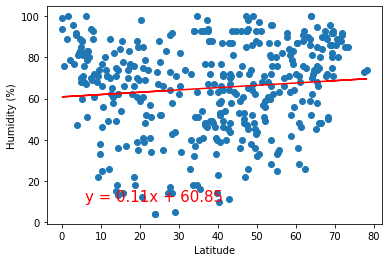

In [16]:
x_axis = NorthernHem_df.Lat
y_axis = NorthernHem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

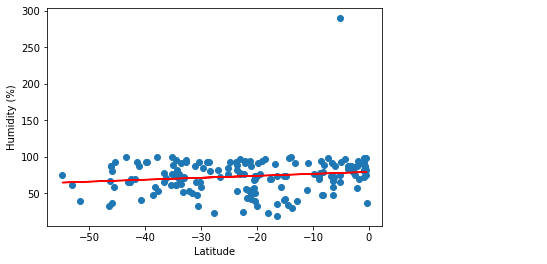

In [17]:
x_axis = SouthernHem_df.Lat
y_axis = SouthernHem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

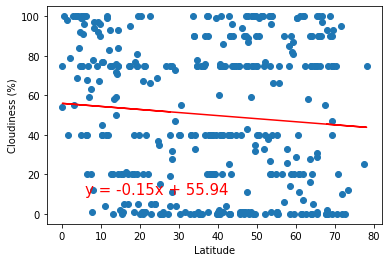

In [18]:
x_axis = NorthernHem_df.Lat
y_axis = NorthernHem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

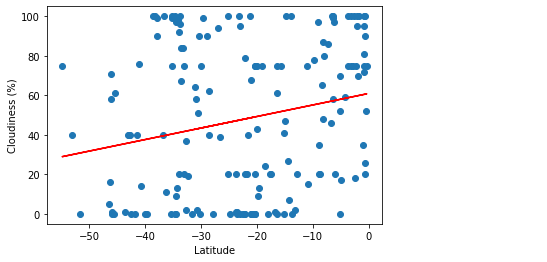

In [19]:
x_axis = SouthernHem_df.Lat
y_axis = SouthernHem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

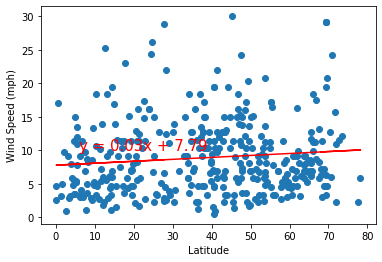

In [20]:
x_axis = NorthernHem_df.Lat
y_axis = NorthernHem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

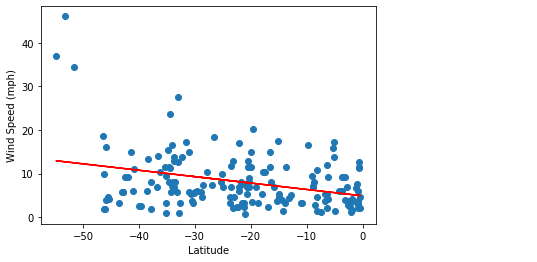

In [21]:
x_axis = SouthernHem_df.Lat
y_axis = SouthernHem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()